![title](figures/logo.png)

Data Preperation

In [2]:
import pandas as pd
import numpy as np
from itertools import chain
from sklearn.decomposition import PCA

## Class Definition

(please see https://github.com/chenson2018/Humana-Mays-Competition/blob/master/Final%20Model/humana_class.py if you would like to view how features were extracted)

In [3]:
from humana_class import DataPrep

## Read in training/holdout and extract features

In [4]:
training = pd.read_csv('HMAHCC_COMP.csv')
test = pd.read_csv('HMAHCC_HOLDOUT.csv')

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
training.columns

Index(['id', 'event_descr', 'event_attr1', 'event_attr2', 'event_attr3',
       'event_attr4', 'event_attr5', 'event_attr6', 'event_attr7',
       'event_attr8', 'event_attr9', 'event_attr10', 'Days',
       'PAY_DAY_SUPPLY_CNT', 'PAYABLE_QTY', 'MME', 'DRUG_TYPE', 'Specialty',
       'Specialty2', 'Specialty3'],
      dtype='object')

In [6]:
test = test[['ID', 'EVENT_DESCR', 'EVENT_ATTR1', 'EVENT_ATTR2', 'EVENT_ATTR3',
       'EVENT_ATTR4', 'EVENT_ATTR5', 'EVENT_ATTR6', 'EVENT_ATTR7',
       'EVENT_ATTR8', 'EVENT_ATTR9', 'EVENT_ATTR10','days', 'PAY_DAY_SUPPLY_CNT',
       'PAYABLE_QTY', 'MME', 'DRUG_TYPE', 'SPECIALTY', 'SPECIALTY2',
       'SPECIALTY3']]

test.columns = training.columns
test

,id,event_descr,event_attr1,event_attr2,event_attr3,event_attr4,event_attr5,event_attr6,event_attr7,event_attr8,event_attr9,event_attr10,Days,PAY_DAY_SUPPLY_CNT,PAYABLE_QTY,MME,DRUG_TYPE,Specialty,Specialty2,Specialty3
0,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,180,510.00,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,90,255.00,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID98975196852,RX Claim - Rejected,PRE-AUTH CLM,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,AMBIEN,ZOLPIDEM TARTRATE TAB 10 MG,2.45421e+07,10,63.15,NaN,-964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID98975196852,RX Claim - New Drug,492700,PROTON PUMP INHIBITORS,OMEPRAZOLE,006,GASTRO,NaN,NaN,OMEPRAZOLE CAP DELAYED RELEASE 20 MG,7.15,49270060.0,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID98975196852,RX Claim - Paid,PROTON PUMP INHIBITORS,NaN,7.15,0,OMEPRAZOLE,GASTRO,NaN,OMEPRAZOLE CAP DELAYED RELEASE 20 MG,7.15,49270060.0,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ID98975196852,RX Claim - Rejected,DENY DUE TO ERRORS,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,LEXAPRO,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),4.56201e+08,90,255.00,NaN,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ID98975196852,RX Claim - Rejected,PRE-AUTH CLM,"SYMPTOMS, SIGNS, ILL DEFINED CONDITIONS",NO DUAL COVERAGE,COPAY EXCEPTIONS,LEXAPRO,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),4.56201e+08,5,34.58,NaN,-963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ID98975196852,RX Claim - New Drug,581600,SELECTIVE SEROTONIN REUPTAKE INHIBITORS (SSRIS),LEXAPRO,004,PSYCH-DEP,NaN,NaN,ESCITALOPRAM OXALATE TAB 5 MG (BASE EQUIV),119.58,58160034.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ID98975196852,RX Claim - New Drug,602040,NON-BARBITURATE HYPNOTICS,AMBIEN,013,NUISANCE-SLEEP,NaN,NaN,ZOLPIDEM TARTRATE TAB 10 MG,150.42,60204080.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ID98975196852,RX Claim - Paid,NON-BARBITURATE HYPNOTICS,NaN,186.14,35.72,AMBIEN,NUISANCE-SLEEP,NaN,ZOLPIDEM TARTRATE TAB 10 MG,150.42,60204080.0,-962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# training = training.iloc[:20000]
# test = test.iloc[:20000]

In [8]:
training_class = DataPrep(training)
test_class = DataPrep(test)

In [9]:
%%time
training_class.get_features(derive_response=True)
test_class.get_features()

c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\chenson\Documents\GitHub\Humana-Mays-Competition\Final Model\humana_class.py:262: RuntimeWarning: All-NaN slice encountered
  maxMME = np.nanmax(prior_day0['MME'].values)
C:\Users\chenson\Documents\GitHub\Humana-Mays-Competition\Final Model\humana_class.py:263: RuntimeWarning: Mean of empty slice
  avgMME = np.nanmean(prior_day0['MME'].values)
c:\users\chenson\appdata\local\programs\python\python37\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Wall time: 14min 13s


C:\Users\chenson\Documents\GitHub\Humana-Mays-Competition\Final Model\humana_class.py:380: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  axis=1, join = 'outer')


In [10]:
training_features = training_class.feature_frame
training_features

,LTOT,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID10010854159,False,15.000000,5.0,15.0,0.000000,0.000000,0.0,0.000000,1.83,1.38,...,-5.827083,-1.440194,-2.612607,-1.891909,-0.929671,-0.359510,-0.474685,-1.747752,-0.471185,-0.390159
ID10013863216,True,10.000000,90.0,180.0,0.000000,0.000000,0.0,0.000000,11.05,0.00,...,78.911681,0.921673,1.581688,1.100533,0.430629,0.207605,0.223252,0.929939,0.234209,0.205002
ID10024447278,True,50.000000,3.0,20.0,22.500000,20.000000,15.0,40.000000,5.00,2.99,...,-10.858223,-1.648665,-3.029095,-2.332854,-1.340008,-0.729227,-1.924404,0.671163,-0.374995,-0.352470
ID1002482139,True,60.000000,30.0,120.0,90.000000,37.254464,789.0,2895.000000,23.72,22.52,...,-10.945533,-1.754316,-3.247826,-2.562327,-1.426616,-0.615339,-0.887676,-3.176650,-2.343692,29.254908
ID1003386406,False,20.000000,15.0,60.0,50.000000,50.000000,3.0,20.000000,7.60,7.60,...,4.142184,-1.162327,-2.119161,-1.539857,-0.769636,-0.292790,-0.392575,-1.432729,-0.388198,-0.320140
ID10036289882,False,37.500000,2.0,15.0,0.000000,0.000000,0.0,0.000000,4.45,1.33,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906054,-0.355247,-0.467977,-1.738096,-0.472536,-0.392941
ID10036954381,False,37.500000,2.0,15.0,37.500000,37.500000,2.0,15.000000,5.50,0.00,...,-10.921630,0.197789,-2.020023,-1.790856,-0.906054,-0.355247,-0.467977,-1.738096,-0.472536,-0.392941
ID10055739763,True,15.000000,5.0,15.0,30.000000,30.000000,3.0,12.000000,2.95,0.00,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412321,-0.344600
ID10074598346,False,20.000000,5.0,20.0,40.000000,25.842105,452.0,1480.000000,3.60,3.05,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412321,-0.344600
ID10081072715,False,20.000000,5.0,20.0,0.000000,0.000000,0.0,0.000000,5.60,5.15,...,-11.086501,2.863164,-0.761061,-1.375237,-0.750601,-0.298814,-0.396333,-1.487345,-0.412321,-0.344600


In [11]:
test_features = test_class.feature_frame
test_features

,MME_on_day0,SUPPLY_CNT_on_day0,PAYABLE_QTY_on_day0,max_MME_prior,avg_MME_prior,total_SUPPLY_CNT_prior,total_PAYABLE_QTY_prior,opioid_cost_on_day_0,opioid_net_payment_on_day_0,supply_times,...,generic_pc0,generic_pc1,generic_pc2,generic_pc3,generic_pc4,generic_pc5,generic_pc6,generic_pc7,generic_pc8,generic_pc9
ID10006701904,15.000000,60.0,180.000000,15.000000,15.000000,180.0,540.000000,12.99,10.04,4,...,48.350820,0.060177,0.142896,0.057026,0.024847,0.000939,0.002130,0.009116,0.017136,-0.079600
ID10020514442,5.000000,15.0,15.000000,30.000000,25.000000,17.0,88.000000,2.95,0.00,3,...,-12.230161,-7.231021,10.118839,1.342366,0.122103,0.045938,-0.120088,-0.554978,-0.045299,0.010036
ID10025902702,20.000000,10.0,40.000000,0.000000,0.000000,0.0,0.000000,6.20,0.00,1,...,-11.962103,-5.205734,5.832193,0.047955,-0.417177,0.122316,-0.308662,-1.175370,-0.049277,0.014249
ID10028172382,10.000000,90.0,180.000000,45.000000,18.544118,344.0,714.000000,11.03,0.00,18,...,78.239224,0.667846,1.584893,1.355974,0.785138,-0.136128,0.346100,1.221751,0.054322,-0.130738
ID10034724702,30.000000,30.0,120.000000,28.125000,28.125000,4.0,15.000000,23.80,0.00,2,...,-11.992713,-1.792174,-4.876462,-6.180490,-5.899270,-16.881595,17.209292,13.213788,-0.014920,-0.008162
ID10052209072,26.250000,4.0,21.000000,0.000000,0.000000,0.0,0.000000,6.50,5.06,1,...,-7.440867,-1.074136,-2.548832,-2.367675,-1.394363,0.256797,-0.639947,-2.254470,-0.052277,0.015857
ID10052944491,30.000000,30.0,90.000000,60.000000,37.500000,345.0,1260.000000,23.50,0.00,13,...,-12.911625,26.174045,7.748421,2.542192,0.829975,-0.093290,0.266059,0.303594,-0.038535,-0.042738
ID1006108150,60.000000,30.0,120.000000,60.000000,52.000000,420.0,1215.000000,73.00,71.80,16,...,-11.896475,-1.506797,-4.337858,-5.212080,-4.468499,4.485905,-18.585502,20.831072,-0.341376,-0.004217
ID10070523158,90.000000,7.0,42.000000,20.000000,15.000000,60.0,120.000000,14.02,13.25,3,...,-11.535768,-1.237208,-3.113675,-3.164151,-2.189380,1.257600,-4.862405,3.008198,-0.123535,0.016400
ID1007116120,56.250000,4.0,30.000000,75.000000,47.023810,12.0,80.000000,7.00,3.43,4,...,-11.554165,-1.419177,-4.146094,1.089799,-0.852420,0.205370,-0.515867,-1.887328,-0.051422,0.020006


## Model

In [12]:
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [13]:
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras import optimizers

Using TensorFlow backend.


In [14]:
class Model:
    def __init__(self, train_set, test_set):
        self.train_set = train_set
        self.test_set = test_set
        
        X = train_set.iloc[:,1:]
        y = train_set.iloc[:,0].map(lambda x: 1 if x == True else 0 )
        
        self.X = X
        self.y = y
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.33, random_state=33)
        
        
    def Random_Forest(self):
        rf_model = RandomForestClassifier(n_estimators=300, 
                                  max_depth=10,
                                  random_state=100,
                                    max_features=0.5,
                                    min_samples_leaf=5)
        
        cv_results = cross_validate(rf_model, self.X_train, self.y_train, cv=3,
                            scoring= 'roc_auc',
                            return_train_score=True,
                            return_estimator =True)
        
        rf_model.fit(self.X_train, self.y_train)
        
        importance = pd.Series(rf_model.feature_importances_, index=self.X_train.columns)
        self.rf_importance = importance.sort_values()[-15:] # show top 15
        
        return rf_model.predict_proba(self.test_set)[:,1]
    
    def LGB(self):
        bst = lgb.LGBMClassifier(boosting_type= 'gbdt',
                        objective = 'binary',
                        max_depth = 3,
                        n_estimators = 1000)

        bst.fit(self.X_train.values, self.y_train.values)
        
        importance = pd.Series(bst.feature_importances_, index=self.X_train.columns)
        self.GBM_importance = importance.sort_values()[-15:] # show top 15
        
        return bst.predict_proba(self.test_set)[:,1]
    
    def Neural_Net(self):
        scaler = StandardScaler()
        scaler.fit(self.X)
        
        X_scale = scaler.transform(self.X)
        y_array = self.y.values
        
        X_train, X_test_s, y_train, y_test = train_test_split(X_scale, y_array, test_size=0.33, random_state=33)
        X_train_mlp, X_validation, y_train_mlp, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=33)
        
        model = Sequential()

        #First Hidden Layer
        model.add(Dense(128, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))

        #Second  Hidden Layer
        model.add(Dense(64, activation='relu', kernel_initializer='random_normal'))    
        
        #Output Layer
        model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        # add early stop to prevent overfitting
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=50)
        mc = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=0, save_best_only=True)

        history = model.fit(X_train, y_train,
                            validation_split = 0.15,
                            epochs=4000, verbose=0, callbacks=[es, mc])

        saved_model = load_model('best_model2.h5')
        
        #scale test data
        scaler.fit(self.test_set)
        X_test_scale = scaler.transform(self.test_set)
        
        NN_predict = saved_model.predict_proba(X_test_scale)
        nn_prob = np.array([ x[0] for x in NN_predict])
        
        self.weights, self.biases = saved_model.layers[0].get_weights()
        
        return nn_prob
    
    def predict(self):
        rf_predictions = self.Random_Forest()
        lgb_predictions = self.LGB()
        nn_predictions = self.Neural_Net()
        
        self.predictions = pd.DataFrame({'LGB':lgb_predictions,
                                         'Random Forest':rf_predictions,
                                         'Neural Net':nn_predictions
                                          }, 
                                          index = self.test_set.index)

        self.predictions['Model Average'] = self.predictions.mean(axis = 1)
        self.predictions['RF+LGB'] = (self.predictions['LGB']+self.predictions['Random Forest'])/2
        
        return self.predictions

In [71]:
test_feat_fill = test_features.copy()
test_feat_fill = test_feat_fill.replace([np.inf, -np.inf], np.nan)
test_feat_fill =test_feat_fill.fillna(test_feat_fill.mean())

In [72]:
model = Model(train_set=training_features, test_set=test_feat_fill)
predictions = model.predict()

In [73]:
%matplotlib inline
import matplotlib.pylab as plt

Text(0.5, 0, 'Predicted Probability')

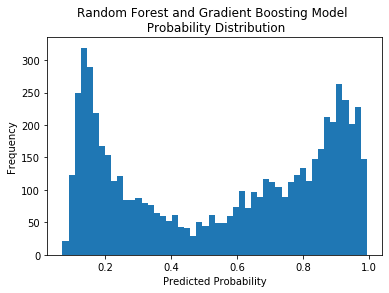

In [74]:
predictions['RF+LGB'].plot(kind = 'hist', bins = 50)
plt.title('Random Forest and Gradient Boosting Model \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [75]:
predictions.

,LGB,Random Forest,Neural Net,Model Average,RF+LGB
ID10006701904,0.811935,0.802561,0.821263,0.811920,0.807248
ID10020514442,0.722123,0.428570,0.483846,0.544846,0.575346
ID10025902702,0.075872,0.348231,0.206314,0.210139,0.212051
ID10028172382,0.963244,0.835484,0.895519,0.898082,0.899364
ID10034724702,0.594913,0.829162,0.858861,0.760979,0.712038
ID10052209072,0.281993,0.271111,0.100027,0.217710,0.276552
ID10052944491,0.868683,0.887856,0.720351,0.825630,0.878270
ID1006108150,0.993018,0.917425,0.909630,0.940024,0.955222
ID10070523158,0.224117,0.460963,0.233681,0.306253,0.342540
ID1007116120,0.097472,0.238878,0.151940,0.162763,0.168175


In [95]:
#no usable data
unused = list(set(test['id'].drop_duplicates())-set(predictions.index))

In [103]:
final_export = predictions[['RF+LGB']]
final_export = final_export.sort_values(by = ['RF+LGB'], ascending = False)
final_export['rank'] = pd.RangeIndex(start=1, stop=5998, step=1)

for patient in unused:
    final_export = final_export.append(pd.Series(name = patient))
    
final_export = final_export.reset_index()
final_export.columns = ['ID', 'Predicted Value', 'Individual Rank']

final_export

,ID,Predicted Value,Individual Rank
0,ID38824705704,0.992958,1.0
1,ID12868925050,0.992484,2.0
2,ID81537300991,0.992066,3.0
3,ID86717775783,0.991855,4.0
4,ID37339052202,0.991486,5.0
5,ID70022980854,0.991035,6.0
6,ID75218829640,0.990330,7.0
7,ID6571730322,0.989472,8.0
8,ID31766117425,0.989466,9.0
9,ID22510992746,0.987956,10.0


In [104]:
final_export.to_csv('CaseCompetition_Christopher_Henson.csv', index = False)

In [ ]:
predictions['Neural Net'].plot(kind = 'hist', bins = 50)
plt.title('Neural Net \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['LGB'].plot(kind = 'hist', bins = 50)
plt.title('Gradient Boosting \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['Random Forest'].plot(kind = 'hist', bins = 50)
plt.title('Random Forest \n Probability Distribution')
plt.xlabel('Predicted Probability')

In [ ]:
predictions['Model Average'].plot(kind = 'hist')

In [ ]:
(predictions['LGB'] - predictions['Random Forest']).abs().mean()

In [ ]:
(predictions['LGB'] - predictions['Neural Net']).abs().mean()

In [ ]:
(predictions['Random Forest'] - predictions['Neural Net']).abs().mean()

## Let's try a validation set to get a feel for model accuracy:

In [ ]:
training_features

In [ ]:
blah1, validation_features, blah1, blah1 = train_test_split(training_features, training_features['LTOT'], test_size=0.33, random_state=11)

In [ ]:
validation_features = validation_features.iloc[:,1:]
validation_features

In [ ]:
validationModel = Model(train_set=training_features, test_set=validation_features)

In [ ]:
validation_predictions = validationModel.predict()

In [ ]:
validation_predictions

In [ ]:
thresh_list = []
fpr_list = []
tpr_list = []

for threshold in np.linspace(0, 1, num=501):
    
    validation_pred = pd.merge(validation_predictions, 
             training_features, 
             left_index=True, 
             right_index=True, 
             how = 'left').iloc[:,:6]
    
    validation_pred['LTOT Binary'] = validation_pred['LTOT'].map(lambda x: 1 if x == True else 0 )
    validation_pred['RF+LGB'] = (validation_pred['Random Forest']+validation_pred['LGB'])/2
    validation_pred['LGB+NN'] = (validation_pred['Neural Net']+validation_pred['LGB'])/2
    validation_pred['RF+NN'] = (validation_pred['Neural Net']+validation_pred['Random Forest'])/2
    
    #change this to predict based on a certain model
    model = 'RF+LGB'
    
    validation_pred['Model Prediction: ' + model] = validation_pred[model].map(lambda x: True if x > threshold else False )

    validation_pred['Check'] = (validation_pred['LTOT']==validation_pred['Model Prediction: ' + model])
    
    
    tab = pd.crosstab(validation_pred['LTOT'], validation_pred['Model Prediction: ' + model])
    
    try:
            tp = tab.loc[True, True]
            tn = tab.loc[False, False]

            fp = tab.loc[False, True]
            fn = tab.loc[True, False]
    except:
        continue
    
    tpr = tp/(tp + fn)
    fpr = fp/(fp+tn)
    
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    
    thresh_list.append( (threshold, 
                         (tp+tn)/len(validation_pred), 
                         validation_pred,
                         tab)  )

In [ ]:
from operator import itemgetter

best_threshhold = max(thresh_list, key=itemgetter(1))

print('Threshold:', best_threshhold[0])
print('Accuracy:', best_threshhold[1])

In [ ]:
plt.scatter(fpr_list, tpr_list)
plt.title('Random Forest and Gradient Boosting Model \n Receiver Operating Characteristic Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
validation_pred = best_threshhold[2]
confusion = best_threshhold[3]
confusion.name = 'Model Prediction: Random Forest and Gradient Boosting'
confusion

## ROC_AUC

In [ ]:
validation_pred

In [ ]:
from sklearn.metrics import roc_auc_score

print('Gradient Boosting ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB']), 4))
print('Random Forest ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Random Forest']), 4))
print('Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Neural Net']),4), '\n')

print('Gradient Boosting and Random Forest ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+LGB']), 4))
print('Gradient Boosting and Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['LGB+NN']), 4))
print('Random Forest and Neural Net ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['RF+NN']),4), '\n')

print('3 Model Average ROC AUC:', round(roc_auc_score(validation_pred['LTOT Binary'], validation_pred['Model Average']), 4))

## Variable Importance

Random Forest:

In [ ]:
validationModel.rf_importance.plot.barh()
plt.title('Random Forest Variable Importance')

GBM:

In [ ]:
validationModel.GBM_importance.plot.barh()
plt.title('Gradient Boosting Variable Importance')

Neural Net Weights:

In [ ]:
pd.Series(np.sum(np.absolute(validationModel.weights), axis = 1), validation_features.columns).sort_values().iloc[-15:].plot.barh()
plt.title('Neural Net Weight Summation')